###### 1) I'm are trying to identify the type of cancer from the image files of one data set consisting of 5 tpes(categories) of cancers. Further we shall save the model and reuse the same model to identify the type of cancer on another data set consisting of 9 categories of cancers  

###### 2) It can be difficult for the medical practioner to identify the correct type of cancer which might have severe repercussions in case incorrect identification. So our model will try to aid the medical practionor to conclude the corrrect type of cancer. It will help its better cure.   

###### 3) I will use machine learning method namely Tensorflow/Keras to solve the problem  and correctly identify the cancer type

###### 4) It is expected that our approcah will be highly accurate than just trying to identify the type of cancer with naked eye and previous experience This will help to better diagonatics and correct traetment of the disease.


# Data Collection: 

##### Data Set 1: Data has been collected from https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
##### Data Set 2:https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic?resource=download


In [2]:
#Importing main libraries to be used in the project
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Loding Cancer Firs Data Set containg 25000 image files of 5 categories of cancer

# Resizing image size from 768X768 to 180X180
image_w, image_h = 180, 180
batch_size= 32

# Converting data into trating and validation sets with 80% as traing data 

train_data = tf.keras.utils.image_dataset_from_directory(
  'klc',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_h, image_w),
  batch_size=batch_size)

val_data = tf.keras.utils.image_dataset_from_directory(
  'klc',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_h, image_w),
  batch_size=batch_size)

Found 25000 files belonging to 5 classes.
Using 20000 files for training.
Found 25000 files belonging to 5 classes.
Using 5000 files for validation.


# Data Exploration: Exploring the Dataset



In [4]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Displaying Class names - Cancer Categories (First Dataset)
class_names = train_data.class_names
print(class_names)


['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']


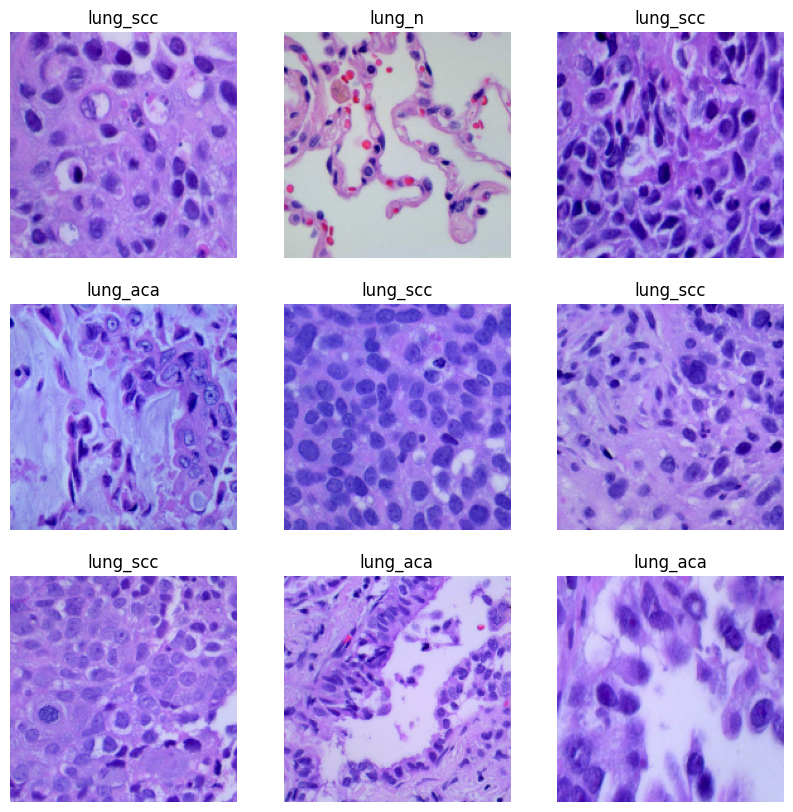

In [5]:
# Displaying the pictures of differnet cancer types for first dataset 

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [33]:
## Your code goes here.
# Creating a emtpy dict
c_dist={}
# looping thru training dataset batches
for image_batch, labels_batch in train_data:
    for i in range(image_batch.shape[0]):
      if class_names[labels_batch[i]] in c_dist:
        c_dist[class_names[labels_batch[i]]]+=1
      else:
        c_dist[class_names[labels_batch[i]]]=1

# Display the distribution as dataframe
import pandas as pd
df_dist= pd.DataFrame({"Class Name":c_dist.keys(), "Samples":c_dist.values()})
df_dist

,Class Name,Samples
0,melanoma,3968
1,dermatofibroma,4022
2,basal cell carcinoma,4009
3,nevus,3972
4,actinic keratosis,4029


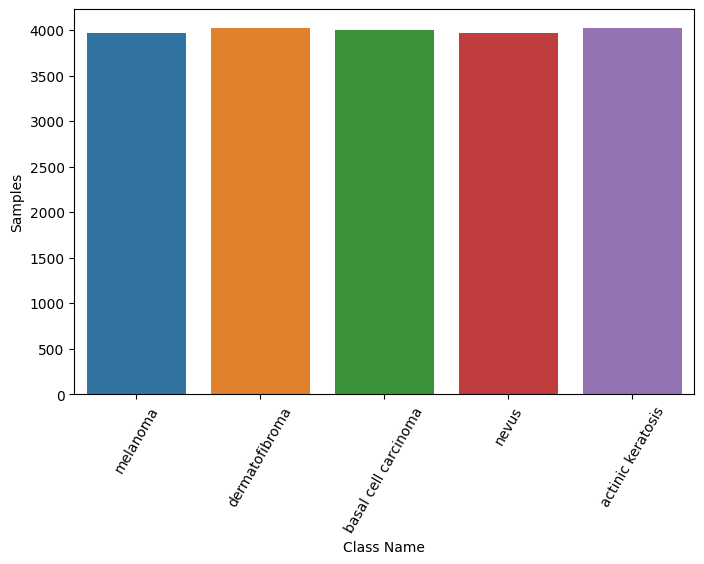

In [34]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(data=df_dist,x='Class Name',y='Samples')
plt.xticks(rotation = 60) 
plt.show()

# Data Analysis

In [8]:

# Creating fully connected (CNN) using 'relu' as activation function and softax as final classifier for Data set 1

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(image_h, image_w, 3)),
    layers.Conv2D(8, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [9]:
# Compiling the model using 'adam' as optimizer 
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

# Results


In [10]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0

In [11]:
# Implementing the model thru 15 epochs
epochs = 17
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/17
625/625 [==============================] - 30s 44ms/step - loss: 0.4449 - accuracy: 0.8070 - val_loss: 0.3821 - val_accuracy: 0.8386
Epoch 2/17
625/625 [==============================] - 28s 45ms/step - loss: 0.2357 - accuracy: 0.9075 - val_loss: 0.2635 - val_accuracy: 0.8908
Epoch 3/17
625/625 [==============================] - 30s 48ms/step - loss: 0.1580 - accuracy: 0.9391 - val_loss: 0.2357 - val_accuracy: 0.9090
Epoch 4/17
625/625 [==============================] - 30s 48ms/step - loss: 0.1122 - accuracy: 0.9588 - val_loss: 0.1720 - val_accuracy: 0.9320
Epoch 5/17
625/625 [==============================] - 30s 47ms/step - loss: 0.0952 - accuracy: 0.9654 - val_loss: 0.1510 - val_accuracy: 0.9416
Epoch 6/17
625/625 [==============================] - 28s 45ms/step - loss: 0.0609 - accuracy: 0.9779 - val_loss: 0.1485 - val_accuracy: 0.9480
Epoch 7/17
625/625 [==============================] - 29s 46ms/step - loss: 0.0528 - accuracy: 0.9806 - val_loss: 0.1404 - val_accuracy:

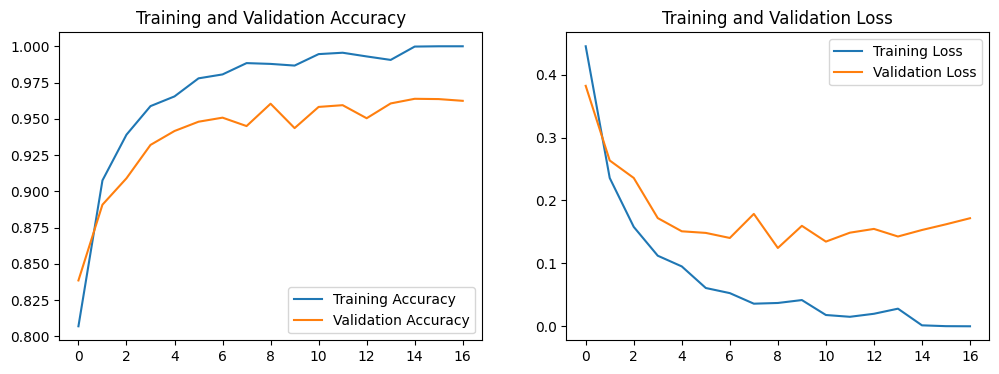

In [12]:
# Drawing graphs between traing and validation data for accurancy as well as loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
# Saving the model
model.save('keras_cancer')

INFO:tensorflow:Assets written to: keras_cancer\assets


### Loading the second Dataset and implementing our saved model on new (2nd Dataset)

In [35]:
image_w, image_h = 180, 180
batch_size= 16

train_datan = tf.keras.utils.image_dataset_from_directory(
  'sc/train',
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(image_h, image_w),
  batch_size=batch_size)

val_datan = tf.keras.utils.image_dataset_from_directory(
  'sc/train',
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(image_h, image_w),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 2016 files for training.
Found 2239 files belonging to 9 classes.
Using 223 files for validation.


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


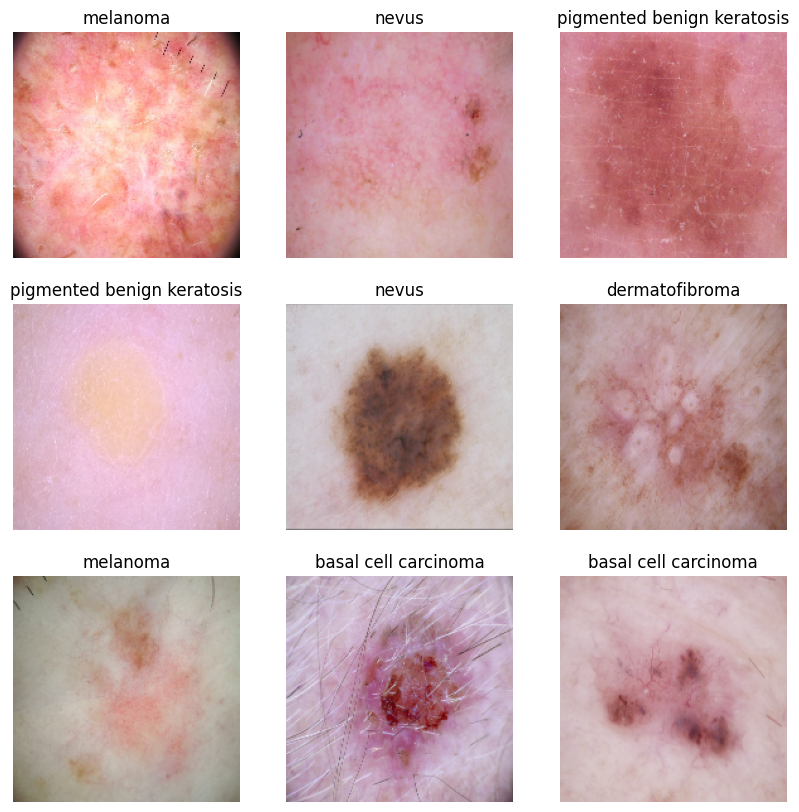

In [36]:
# Class Names and Data display
class_names = train_datan.class_names
print(class_names)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_datan.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(int(labels[i]))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [37]:
## Your code goes here.
# Creating a emtpy dict
c_distn={}
# looping thru training dataset batches
for image_batch, labels_batch in train_datan:
    for i in range(image_batch.shape[0]):
      if class_names[labels_batch[i]] in c_distn:
        c_distn[class_names[labels_batch[i]]]+=1
      else:
        c_distn[class_names[labels_batch[i]]]=1

# Display the distribution as dataframe
import pandas as pd
df_distn= pd.DataFrame({"Class Name":c_distn.keys(), "Samples":c_distn.values()})
df_distn

,Class Name,Samples
0,pigmented benign keratosis,415
1,nevus,323
2,vascular lesion,125
3,melanoma,398
4,basal cell carcinoma,339
5,seborrheic keratosis,69
6,dermatofibroma,86
7,squamous cell carcinoma,161
8,actinic keratosis,100


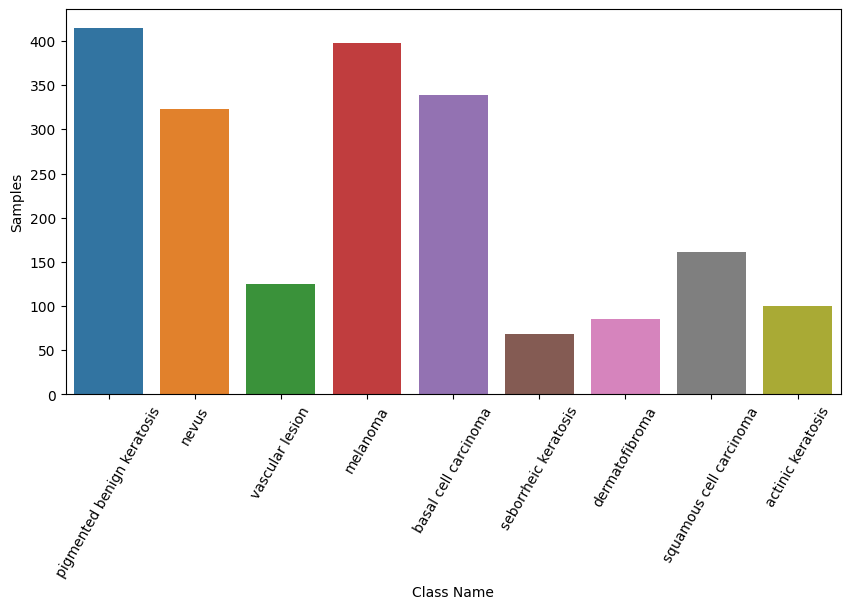

In [38]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(data=df_distn,x='Class Name',y='Samples')
plt.xticks(rotation = 60) 
plt.show()

In [39]:
# Loading our csutomized already saved model
modeln = tf.keras.models.load_model('keras_cancer')

In [40]:
# Changing the number of output classes to 9 classess  (as per dataset 2) from originall 5 classess in dataset 1
for layer in modeln.layers[:8]:
    layer.trainable = False
    
input = tf.keras.Input(shape=(180,180,3))
x = modeln(input)
x = tf.keras.layers.Dense(9, activation='softmax')(x)
new_model = tf.keras.models.Model(inputs=input, outputs=x)

In [42]:
# compiling the new model
new_model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [43]:
# Summary of New Model
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 5)                 825621    
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 54        
Total params: 825,675
Trainable params: 379
Non-trainable params: 825,296
_________________________________________________________________


In [44]:
# Implementing new Model
epochs = 75
history1 = new_model.fit(
  train_datan,
  validation_data=val_datan,
  epochs=epochs
)

Epoch 1/75
126/126 [==============================] - 5s 32ms/step - loss: 2.2604 - accuracy: 0.1696 - val_loss: 2.2120 - val_accuracy: 0.2108
Epoch 2/75
126/126 [==============================] - 4s 31ms/step - loss: 2.1685 - accuracy: 0.2073 - val_loss: 2.1451 - val_accuracy: 0.2152
Epoch 3/75
126/126 [==============================] - 4s 30ms/step - loss: 2.1015 - accuracy: 0.2297 - val_loss: 2.1000 - val_accuracy: 0.2018
Epoch 4/75
126/126 [==============================] - 4s 30ms/step - loss: 2.0516 - accuracy: 0.2455 - val_loss: 2.0669 - val_accuracy: 0.2197
Epoch 5/75
126/126 [==============================] - 4s 32ms/step - loss: 2.0146 - accuracy: 0.2579 - val_loss: 2.0457 - val_accuracy: 0.2197
Epoch 6/75
126/126 [==============================] - 4s 33ms/step - loss: 1.9909 - accuracy: 0.2688 - val_loss: 2.0324 - val_accuracy: 0.2332
Epoch 7/75
126/126 [==============================] - 4s 33ms/step - loss: 1.9752 - accuracy: 0.2778 - val_loss: 2.0291 - val_accuracy: 0.2332

Epoch 58/75
126/126 [==============================] - 5s 38ms/step - loss: 1.7532 - accuracy: 0.3686 - val_loss: 1.8705 - val_accuracy: 0.3229
Epoch 59/75
126/126 [==============================] - 5s 41ms/step - loss: 1.7472 - accuracy: 0.3745 - val_loss: 1.8706 - val_accuracy: 0.3318
Epoch 60/75
126/126 [==============================] - 5s 39ms/step - loss: 1.7461 - accuracy: 0.3750 - val_loss: 1.8689 - val_accuracy: 0.3318
Epoch 61/75
126/126 [==============================] - 6s 41ms/step - loss: 1.7434 - accuracy: 0.3725 - val_loss: 1.8737 - val_accuracy: 0.3184
Epoch 62/75
126/126 [==============================] - 6s 43ms/step - loss: 1.7404 - accuracy: 0.3780 - val_loss: 1.8692 - val_accuracy: 0.3229
Epoch 63/75
126/126 [==============================] - 5s 39ms/step - loss: 1.7379 - accuracy: 0.3770 - val_loss: 1.8633 - val_accuracy: 0.3274
Epoch 64/75
126/126 [==============================] - 5s 38ms/step - loss: 1.7348 - accuracy: 0.3864 - val_loss: 1.8595 - val_accuracy:

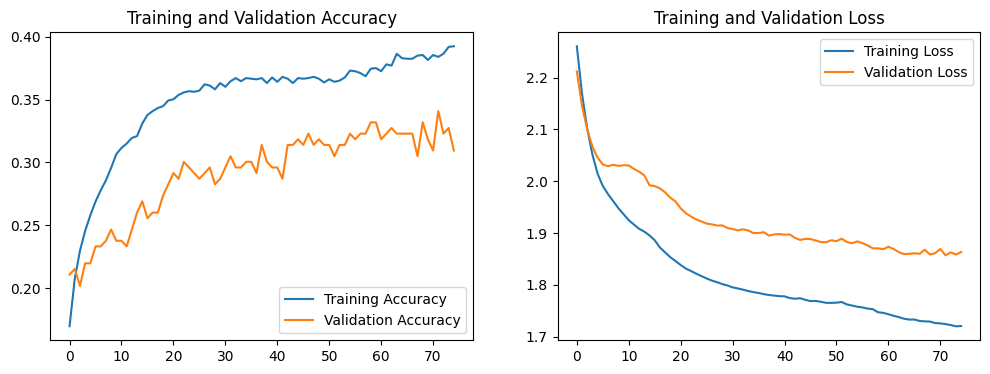

In [45]:
# Drawing graphs between traing and validation data for accurancy as well as loss for new model

accn = history1.history['accuracy']
val_accn = history1.history['val_accuracy']

lossn = history1.history['loss']
val_lossn = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accn, label='Training Accuracy')
plt.plot(epochs_range, val_accn, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, lossn, label='Training Loss')
plt.plot(epochs_range, val_lossn, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### We succefully implemented the CNN on first data about 100% accuracy for traing data and more than 96% accuracy for Validation Data. We tried to impement and reuse (a case of transfer learning) the same model for another set of data with more labels (9 labels)  but we could not get the satisfactory results. Hopefully we can achieve good results with more rigorous  changes in model structure. 

### However our original model (for irst data) can correctly predict the first data set (containg 5 labels) and it can be really helpful in identifying correct type of cancer. 